## Теоретический материал — TensorFlow, Keras и среда выполнения GPU на Colaboratory

Нейронные сети являются мощным инструментом в области машинного обучения и искусственного интеллекта. Они имитируют работу человеческого мозга, используя искусственные нейроны для обработки и анализа данных. Нейронные сети способны решать широкий спектр задач, начиная от классификации изображений и заканчивая прогнозированием временных рядов. В этой части мы рассмотрим несколько примеров программ нейронных сетей, которые помогут вам лучше понять, как они работают и как их можно использовать в различных задачах. Мы начнем с простых примеров и постепенно перейдём к более сложным моделям.

---

### TensorFlow

TensorFlow — бесплатная платформа машинного обучения на Python с открытым исходным кодом, разработанная в основном в Google. Как и у NumPy, основная цель TensorFlow — дать инженерам и исследователям возможность манипулировать математическими выражениями с числовыми тензорами. Но TensorFlow может намного больше, чем NumPy, в том числе:

- автоматически вычислять градиент любого дифференцируемого выражения, что делает её прекрасной основой для машинного обучения;
- работать не только на обычных, но также на графических и тензорных процессорах — высокопараллельных аппаратных ускорителях;
- распределять вычисления между множеством компьютеров;
- экспортировать вычисления другим окружениям выполнения, таким как C++, JavaScript (для веб-приложений, выполняющихся в браузере) или TensorFlow Lite (для приложений, действующих в мобильных или встраиваемых устройствах) и т. Д. Это упрощает развёртывание приложений TensorFlow в практических условиях.

---

### Keras

Keras — это высокоуровневая библиотека для создания и обучения нейронных сетей на языке Python. Она упрощает процесс разработки моделей, предоставляя удобный интерфейс для работы с TensorFlow и другими фреймворками. Keras позволяет быстро прототипировать модели и легко экспериментировать с различными архитектурами нейронных сетей.

Благодаря TensorFlow, библиотека Keras может работать на различных типах оборудования — графическом, тензорном или обычном процессоре — и поддерживает простую возможность распределения вычислений между тысячами компьютеров.

### TensorFlow — это низкоуровневая платформа тензорных вычислений, а Keras — высокоуровневая библиотека глубокого обучения
```text
┌──────────────────────┐
│ Keras │ ← Высокоуровневый API (слои, модели, оптимизаторы)
├──────────────────────┤
│ TensorFlow │ ← Низкоуровневое ядро (тензоры, операции, автоматическое дифференцирование)
├──────────────────────┤
│ CPU GPU TPU │ ← Аппаратное обеспечение (выполнение)
└──────────────────────┘
```

> - **Keras** — абстракция над TensorFlow, упрощает создание моделей.  
> - **TensorFlow** — ядро: управляет тензорами, градиентами, распределёнными вычислениями.  
> - **CPU/GPU/TPU** — устройства выполнения — выбор зависит от задачи и доступности.

---

### Colaboratory и работа со средой выполнения GPU

**Colaboratory** (или просто **Colab**) — это бесплатная облачная служба для блокнотов Jupyter, не требующая установки дополнительного программного обеспечения. По сути, это веб-страница, позволяющая сразу же писать и выполнять сценарии, используя Keras. Она даёт доступ к бесплатной (но ограниченной) среде выполнения на графическом процессоре и даже к среде выполнения на тензорном процессоре (TPU), благодаря чему вам не придётся покупать свой GPU.

Чтобы начать работу со средой выполнения GPU в Colab, выберите в меню пункт:  
**Runtime → Change Runtime Type → Hardware Accelerator → T4 GPU**

> В Colab можно выбрать:
> - `CPU` — стандартный процессор.
> - `GPU` — графический процессор (рекомендуется для обучения нейросетей).
> - `TPU` — тензорный процессор (для очень больших моделей).

---

### Рис. 2. Выбор среды выполнения GPU в Colab

![Выбор среды выполнения](https://cdn.prod.website-files.com/630ca238d7b194730630c5ee/6665df8f0c67b7b568cf642c_Screenshot%202024-06-03%20at%2008.58.16%20(1).png)
 
> - Откройте меню **Runtime → Change Runtime Type**.  
> - В выпадающем списке **Hardware Accelerator** выберите **T4 GPU**.  
> - Нажмите **Save** — среда перезапустится с GPU-ускорением.

---

### Рекомендация для выполнения примеров

Для выполнения примеров и заданий данной рабочей тетради рекомендуем использовать **Jupyter Notebook**, а также **Google Colaboratory** (`https://colab.research.google.com/`) со средой выполнения **GPU** для увеличения скорости обучения.

> - Бесплатный доступ к GPU/TPU.
> - Не нужно устанавливать библиотеки — всё уже настроено.
> - Автоматическое сохранение в Google Drive.

## Пример 1. Простой пример нейронной сети на Python с использованием библиотек Keras

### Установка Keras и TensorFlow

Для начала установим необходимые библиотеки:


In [1]:
pip install keras, tensorflow

Note: you may need to restart the kernel to use updated packages.


Создание простой нейронной сети
Рассмотрим пример создания простой нейронной сети для задачи классификации. В этом примере мы создадим модель, которая будет классифицировать данные на два класса. Мы будем использовать 20 входных признаков и один выходной нейрон с сигмоидной активацией.

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Генерация данных
X = np.random.rand(1000, 20)
y = np.random.randint(2, size=(1000, 1))

# Создание модели
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X, y, epochs=10, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4710 - loss: 0.7013   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5240 - loss: 0.6932 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5130 - loss: 0.6910 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5380 - loss: 0.6867 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5240 - loss: 0.6874 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5370 - loss: 0.6846 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5670 - loss: 0.6818 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 0.6816 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5710 - loss: 0.6790 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5560 - loss: 0.6789 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5760 - loss: 0.6759  
Loss: 0.6759046316146851, Accuracy: 0.5759999752044678


Этот пример демонстрирует, как создать и обучить простую нейронную сеть
для бинарной классификации. Мы используем 20 входных признаков и один
выходной нейрон с сигмоидной активацией. Модель состоит из двух слоев:
первый слой содержит 64 нейрона с активацией ReLU, а второй слой - один
нейрон с активацией сигмоид. Мы используем функцию потерь
**binary_crossentropy** и **оптимизатор adam**.


## Задание 1.

1. Изучите и выполните пример 1 на **Jupyter Notebook** или **Colab**.
2. Поэкспериментируйте с новыми параметрами:
   - Первый слой содержит **128 нейронов** с активацией `tanh`.
   - Второй слой — **один нейрон** с активацией `softmax`.
   - Изменить оптимизатор на `rmsprop`.
### Решение:

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Генерация данных для бинарной классификации
X = np.random.rand(1000, 20)
y = np.random.randint(2, size=(1000, 1))  # метки: 0 или 1
# Создание модели
model = Sequential()
model.add(Dense(128, input_dim=20, activation='tanh'))  # первый слой: 128 нейронов, tanh
model.add(Dense(1, activation='softmax'))               # второй слой: 1 нейрон, softmax 
# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Обучение модели
model.fit(X, y, epochs=10, batch_size=32)
# Оценка модели
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4890 - loss: 0.7058   
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6960 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6947 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6933 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6913 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6874 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6926 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6894 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6874 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4890 - loss: 0.6926 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4890 - loss: 0.6937  
Loss: 0.6937488913536072, Accuracy: 0.48899999260902405


## Пример 2. Пример нейронной сети для классификации изображений с использованием TensorFlow

Перед нами стоит задача: реализовать классификацию черно-белых изображений рукописных цифр (28 × 28 пикселей) по десяти категориям (от 0 до 9).  
Мы будем использовать набор данных **MNIST**, популярный в сообществе исследователей глубокого обучения, который существует практически столько же, сколько сама область машинного обучения, и широко используется для обучения.  
Этот набор содержит **60 000 обучающих изображений** и **10 000 контрольных изображений**, собранных Национальным институтом стандартов и технологий США (National Institute of Standards and Technology — часть NIST
в аббревиатуре MNIST) в 1980-х годах. «Решение» задачи MNIST можно
рассматривать как своеобразный аналог Hello World в глубоком обучении —
часто это первое действие, которое выполняется для уверенности, что
алгоритмы действуют в точности как ожидалось. По мере углубления в
практику машинного обучения вы увидите, что MNIST часто упоминается в
научных статьях, блогах и т. д. 

### Рис. 3. Образцы изображений MNIST
![Образцы цифр MNIST](https://avatars.mds.yandex.net/i?id=ec6f83838f530e841165303efb6e8281cdcb2806-12475602-images-thumbs&n=13)

Набор данных MNIST уже входит в состав Keras в форме набора из
четырех массивов NumPy.
Загрузка набора данных MNIST в Keras
```python
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```
Здесь `train_images` и `train_labels` — это **обучающий набор**, то есть данные, на которых модель обучается.  
После обучения модель будет проверяться тестовым (или контрольным) набором: `test_images` и `test_labels`.

Изображения хранятся в массивах NumPy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом соответствии, один к одному.
### Рассмотрим обучающие данные:
```text
train_images.shape
→(60000, 28, 28)
len(train_labels)
→60000
train_labels
→array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
```
Вот что мы будем делать дальше:  
сначала передадим нейронной сети обучающие данные — `train_images` и `train_labels`.  
Сеть будет подбирать правильные метки для изображений.  
А затем мы предложим ей классифицировать изображения в `test_images` и проверим точность классификации по меткам из `test_labels`.


### Теперь сконструируем сеть.

```python
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```
**Основным строительным блоком нейронных сетей является слой.**
Слой можно рассматривать как фильтр для данных: он принимает их и выводит в некоторой более полезной форме.
В частности, слои извлекают **представления** из входных данных, которые, как мы надеемся, будут иметь больше смысла для решаемой задачи.
Фактически методика глубокого обучения заключается в объединении простых слоёв, реализующих некую форму поэтапной очистки данных.

Модель глубокого обучения можно сравнить с ситом, состоящим из последовательности фильтров — слоёв — все более тонкой работы с данными.

В нашем случае сеть состоит из последовательности двух слоёв `Dense`, которые являются **тесно связанными** (их ещё называют **полносвязными**) нейронными слоями.
Второй (и последний) слой — это десятиэлементный слой классификации `softmax`, возвращающий массив с десятью оценками вероятностей (в сумме дающих 1).
Каждая оценка определяет вероятность принадлежности текущего изображения к одному из десяти классов цифр.

Чтобы подготовить модель к обучению, нужно настроить ещё три параметра для этапа компиляции:

- **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
- **функция потерь** — определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, корректировать её в правильном направлении;
- **метрики для мониторинга** на этапах обучения и тестирования — здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

---

### Этап компиляции:

```python
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

Перед обучением мы выполним предварительную обработку данных, преобразовав их в форму, которую ожидает получить нейронная сеть, и масштабируем их так, чтобы все значения оказались в интервале `[0, 1]`.

Исходные данные — обучающие изображения — хранятся в трёхмерном массиве `(60000, 28, 28)` типа `uint8`, значениями в котором являются числа в интервале `[0, 255]`.  
Мы преобразуем его в массив `(60000, 28 * 28)` типа `float32` со значениями в интервале `[0, 1]`.

---

### Подготовка исходных данных:

```python
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
```
Теперь можно начать обучение сети.  
Для этого в библиотеке Keras достаточно вызвать метод `fit` модели — он попытается **адаптировать (fit)** модель под обучающие данные.

---

### Обучение («адаптация») модели:

```python
model.fit(train_images, train_labels, epochs=5, batch_size=128)
```
```text
Epoch 1/5
469/469 ────────────────────────────────────── 9s 16ms/step - accuracy: 0.8715 - loss: 0.4424
Epoch 2/5
469/469 ────────────────────────────────────── 8s 11ms/step - accuracy: 0.9650 - loss: 0.1188
Epoch 3/5
469/469 ────────────────────────────────────── 6s 12ms/step - accuracy: 0.9782 - loss: 0.0740
Epoch 4/5
469/469 ────────────────────────────────────── 4s 9ms/step - accuracy: 0.9850 - loss: 0.0509
Epoch 5/5
469/469 ────────────────────────────────────── 5s 11ms/step - accuracy: 0.9894 - loss: 0.0377
```
В процессе обучения отображаются две величины:  
- **потери сети на обучающих данных** (`loss`) — показывает, насколько модель ошибается.  
- **точность сети на обучающих данных** (`accuracy`) — доля правильно классифицированных изображений.

Мы быстро достигли точности **0.9894 (98.94%)** — это отличный результат для простой модели!

---

### Теперь у нас есть обученная модель, которую можно использовать для прогнозирования вероятности принадлежности новых цифр к классам — изображений, которые не входили в обучающую выборку, как те из контрольного набора.

---

### Использование модели для получения предсказаний:

```python
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]
```
```text
array([1.63e-07, 2.58e-09, 1.78e-05, 2.36e-05, 1.45e-07, 3.12e-07,
       4.39e-08, 9.99e-01, 1.38e-05, 1.01e-06], dtype=float32)
```
Каждое число в элементе массива с индексом `i` соответствует вероятности принадлежности изображения цифры `test_digits[0]` к классу `i`.

Наивысшая оценка вероятности (`0.9994940` — почти 1) для этого тестового изображения находится в элементе с индексом `7`, то есть согласно нашей модели — перед нами изображение цифры **7**.

---

### Прогноз можно проверить по массиву меток:

```python
predictions[0].argmax()
7
predictions[0][7]
0.999494
test_labels[0]
7
```
**В целом, насколько хорошо справляется наша модель с классификацией — прежде не встречавшихся ей цифр?**
Давайте проверим, вычислив среднюю точность по всему контрольному набору изображений.
```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}')
313/313 ────────────────────────────────────── 1s 4ms/step - accuracy: 0.9788 - loss: 0.0761
test_acc: 0.9787999977602234
```
Точность на контрольном наборе составила *97,88 %* — немного меньше,
чем на обучающем (98,94 %). Эта разница демонстрирует пример переобучения
(**overfitting**), когда модели машинного обучения показывают точность на новом
наборе данных худшую, чем на обучающем. 

## Задание 2.

Изучите и выполните **Пример 2** на **Jupyter Notebook** или **Colab**.  
Измените параметры:

- **размер мини-выборки (batch_size)** на `64`
- **число эпох (epochs)** на `20`

Посмотрите новый результат точности на контрольном наборе и сравните с результатом Примера 2.
### Решение:

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Подготовка данных
train_images = x_train.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = x_test.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = y_train
test_labels = y_test

# Создание модели
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение с новыми параметрами
history = model.fit(
    train_images, 
    train_labels, 
    epochs=20,          # ← изменено с 5 на 20
    batch_size=64       # ← изменено с 128 на 64
)

# Оценка на тестовом наборе
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nТочность на тестовом наборе: {test_acc:.4f} ({test_acc * 100:.2f}%)')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9333 - loss: 0.2262
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9728 - loss: 0.0909
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9814 - loss: 0.0609
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0437
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9900 - loss: 0.0329
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0240
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0186
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9959 - loss: 0.0135
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0102
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9981 - loss: 0.0070
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9984 - loss: 0.0058


## Пример 3. Пример простой сверточной нейронной сети

Рассмотрим практический пример простой сверточной нейронной сети, классифицирующей изображения рукописных цифр на наборе MNIST.  
Эту задачу мы решили в примере 2, использовав полносвязную сеть (её точность на контрольных данных составила **97,88 %**).  
Несмотря на простоту сверточной нейронной сети, её точность будет значительно выше полносвязной модели из примера 2.


В следующем листинге показано, как выглядит простая сверточная нейронная сеть.  
Это стек слоёв `Conv2D` и `MaxPooling2D`. Как она действует — расскажется чуть ниже.  
Мы построим модель с помощью **функционального API** Keras.


### Создание небольшой сверточной нейронной сети:

```python
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
```
Важно отметить, что данная сеть принимает на входе тензоры с формой `(высота_изображения, ширина_изображения, каналы)`, не включая измерение, определяющее пакеты.  
В данном случае мы настроили сеть на обработку входов с размерами `(28, 28, 1)`, соответствующими формату изображений в наборе MNIST.

### Рассмотрим поближе текущую архитектуру сети.

Сводная информация о сети:

```python
model.summary()
```
### Сводная информация о модели (вывод `model.summary()`):

| Layer (type)               | Output Shape          | Param #   |
|----------------------------|-----------------------|-----------|
| input_layer (InputLayer)   | (None, 28, 28, 1)     | 0         |
| conv2d (Conv2D)            | (None, 26, 26, 32)    | 320       |
| max_pooling2d (MaxPooling2D)| (None, 13, 13, 32)   | 0         |
| conv2d_1 (Conv2D)          | (None, 11, 11, 64)    | 18,496    |
| max_pooling2d_1 (MaxPooling2D)| (None, 5, 5, 64)    | 0         |
| conv2d_2 (Conv2D)          | (None, 3, 3, 128)     | 73,856    |
| flatten (Flatten)          | (None, 1152)          | 0         |
| dense (Dense)              | (None, 10)            | 11,538    |

**Total params:** 104,202  
**Trainable params:** 104,202  
**Non-trainable params:** 0
Как видите, все слои `Conv2D` и `MaxPooling2D` выводят трёхмерный тензор с формой `(высота, ширина, каналы)`.  
Измерения ширины и высоты сжимаются с ростом глубины сети. Количество каналов управляется первым аргументом, передаваемым в слой `Conv2D` (32, 64 или 128).

Последний слой `Conv2D` выдаёт результат с формой `(3, 3, 128)` — карту признаков 3×3 с 128 каналами.

Следующий шаг — передача этого результата на вход полносвязной классифицирующей сети, подобной той, с которой мы уже знакомы: стека слоёв `Dense`.  
Эти классификаторы обрабатывают векторы — одномерные массивы, — тогда как текущий выход является трёхмерным тензором.

Чтобы преодолеть это несоответствие, мы преобразуем трёхмерный вывод в одномерный с помощью слоя `Flatten`, а затем добавляем полносвязные слои `Dense`.


### В заключение выполняется классификация по десяти категориям, поэтому последний слой имеет десять выходов и активацию `softmax`.

Теперь обучим сверточную сеть распознаванию цифр MNIST.  
Мы будем повторно брать большое количество программного кода из примера 2.

Поскольку модель выполняет классификацию по десяти категориям с активацией `softmax`, мы используем функцию потерь **категориальной перекрёстной энтропии**, а так как метки являются целыми числами, нам понадобится разреженная версия — `sparse_categorical_crossentropy`.


### Обучение сверточной нейронной сети на данных из набора MNIST:

```python
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)
```
Оценим модель на контрольных данных. Оценка сверточной сети:
```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")
Test accuracy: 0.991
```
Полносвязная сеть из примера 2 показала точность 97,88 % на
контрольных данных, а простенькая сверточная нейронная сеть — 99,1 %: мы
уменьшили процент ошибок на 68 % (относительно). Неплохо!

## Задание 3.

1. Изучите и выполните **Пример 3** на **Jupyter Notebook** или **Colab**.
2. На основе блокнота (ноутбука) Примера 3 постройте **новую модель сверточных нейронных сетей** с:
   - **5 слоями `Conv2D`**
   - **4 слоями `MaxPooling2D`**
   — для классификации изображений на наборе данных MNIST.
3. Обучите модель и сравните новый результат точности с результатом в Примере 3.

### Решение:

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Загрузка и подготовка данных
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Оригинальная модель
model_orig = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model_orig.compile(optimizer='rmsprop',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

print("Обучение оригинальной модели...")
model_orig.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)
orig_loss, orig_acc = model_orig.evaluate(test_images, test_labels, verbose=0)
print(f"Оригинальная модель — Test accuracy: {orig_acc:.4f}")

# Новая модель: 5 Conv2D + 4 MaxPooling2D
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(2)(x)        # 14x14

x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)        # 7x7

x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)        # 3x3

x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)        # 1x1

x = layers.Conv2D(10, 1, activation='relu')(x)  # 1x1x10
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_new = keras.Model(inputs=inputs, outputs=outputs)
model_new.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nОбучение новой модели (5 Conv + 4 Pool)...")
model_new.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)
new_loss, new_acc = model_new.evaluate(test_images, test_labels, verbose=0)
print(f"Новая модель — Test accuracy: {new_acc:.4f}")

print("\n=== Сравнение точности ===")
print(f"Оригинальная модель: {orig_acc:.4f}")
print(f"Новая модель:        {new_acc:.4f}")
print(f"Разница:             {new_acc - orig_acc:+.4f}")

Обучение оригинальной модели...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9498 - loss: 0.1623
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9854 - loss: 0.0455
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9899 - loss: 0.0318
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9925 - loss: 0.0244
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9944 - loss: 0.0184
Оригинальная модель — Test accuracy: 0.9918

Обучение новой модели (5 Conv + 4 Pool)...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9172 - loss: 0.2676
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9841 - loss: 0.0541
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9893 - loss: 0.0361
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9921 - loss: 0.0252
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9938 - loss: 0.0196
Новая модель — Test 

## Пример 4. Пример сверточной нейронной сети для распознавания объектов на изображениях из набора данных CIFAR-10

Сверточные нейронные сети (**Convolutional Neural Networks — CNN**) особенно эффективны для обработки изображений.  
Они используют **сверточные слои** для автоматического извлечения признаков из изображений.

Рассмотрим пример использования CNN для распознавания объектов на изображениях из набора данных **CIFAR-10**.

---

### CIFAR-10 — это один из самых популярных наборов данных для обучения моделей компьютерного зрения.

Он содержит **60 000 цветных изображений** размером **32×32 пикселя**, размеченных на **10 классов**:
- самолёт
- автомобиль
- птица
- кот
- олень
- собака
- лягушка
- лошадь
- корабль
- грузовик

По **6000 изображений на класс**.  
Набор состоит из:
- **50 000 обучающих изображений**
- **10 000 контрольных изображений**

### Тестовых изображений. Вот классы в наборе данных, а также 10 случайных изображений из каждого (рис. 4):

![Рис. 4. Набор данных CIFAR-10](https://i2.wp.com/miro.medium.com/1*5ym54gUJ6QYAKQc7UvJFMQ.png)

> На изображении показаны 10 классов CIFAR-10 и по 10 случайных изображений из каждого класса.  
> Каждое изображение имеет размер 32×32 пикселя и 3 канала (RGB).

---

### Набор данных разделён на пять обучающих пакетов и один тестовый пакет, каждый из которых содержит 10 000 изображений.

Обучающие пакеты содержат 1000 случайно выбранных изображений из каждого класса.  
Тестовый пакет содержит 1000 выбранных изображений из каждого класса.  
Обучающие пакеты содержат оставшиеся изображения в случайном порядке, но некоторые обучающие пакеты могут содержать больше изображений одного класса, чем из другого.  
Между ними обучающие пакеты содержат **5000 изображений из каждого класса**.

---

### Для распознавания объектов на изображениях из набора данных CIFAR-10 мы будем использовать такую сверточную нейронную сеть:

![Архитектура CNN для CIFAR-10](https://i2.wp.com/findface.pro/wp-content/uploads/2017/04/Machine-learning-004-rus-01-2-1024x427.png)

> Сеть включает два каскада из слоёв свёртки и подвыборки (всего 6 слоёв), предназначенные для выделения признаков изображений.  
> Затем следует классификатор из двух полносвязных слоёв (512 и 10 нейронов).  
> Как и при распознавании цифр, выходной слой содержит вероятности принадлежности изображения к тому или иному классу.

---

### На вход нейронной сети поступают изображения размером 32×32 в трёх каналах (RGB — красный, зелёный и синий).
На первом слое свёртки используются **32 карты признаков** размера **3×3**, т.е. каждый нейрон сверточного слоя подключён к квадратному участку входного изображения. Всего на этом слое используются 32 разных карты признаков.

Следующий свёрточный слой имеет такую же архитектуру: **32 карты признаков** с ядром свёртки **3×3**. После этого идёт слой подвыборки (**MaxPooling**), на котором выполняется уменьшение размерности для каждой карты признаков отдельно, поэтому здесь тоже используются **32 карты**, а размер поля подвыборки — **2×2**.

После слоя подвыборки начинается новый каскад сверточных слоёв. На **третьем и четвёртом** слоях свёртки используются **64 карты признаков** размером **3×3**. А на **втором слое подвыборки**, который следует после этих сверточных слоёв, также происходит уменьшение размерности с окном **2×2**.

После этого данные преобразуются из двумерного формата в одномерный и передаются на **полносвязный слой**, на котором уже и выполняется классификация.

---

Теперь рассмотрим, как реализовать такую сеть с помощью библиотеки **Keras** и обучить её на наборе данных **CIFAR-10**.  
Как всегда, сначала выполняем импорт необходимых элементов из библиотеки Keras и NumPy:


In [1]:
# Импорт необходимых библиотек
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Задаём seed для повторяемости результатов:
np.random.seed(42)

Загружаем данные из набора CIFAR-10:

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Список с названиями классов набора данных CIFAR-10:

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Просматриваем примеры изображений:

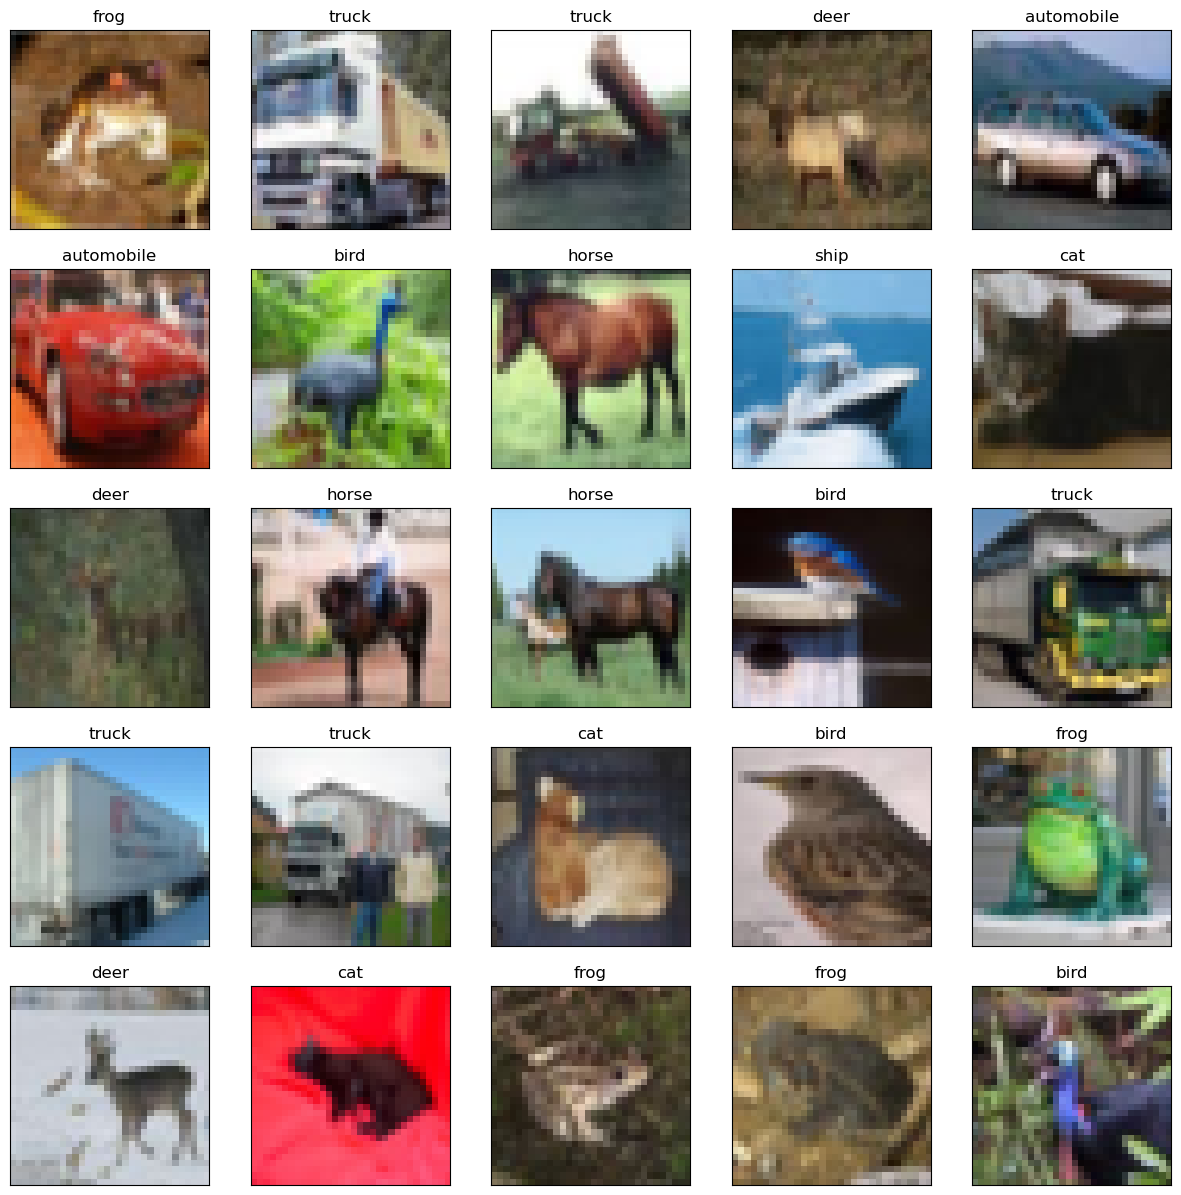

In [4]:
# Создаём новую фигуру
plt.figure(figsize=(15, 15))

# Прокрутить первые 25 изображений
for i in range(25):
    # Создаём подсюжет (subplot) для каждого изображения
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Показать изображение
    plt.imshow(X_train[i])

    # Установить метку в качестве заголовка
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Показать изображения
plt.show()

In [5]:
# Размер мини-выборки
batch_size = 32

# Количество классов изображений
nb_classes = 10

# Количество эпох для обучения
nb_epoch = 25

# Размер изображений
img_rows, img_cols = 32, 32

# Количество каналов в изображении: RGB
img_channels = 3

Нам необходимо выполнить предварительную обработку данных.
Нормализуем данные о интенсивности пикселей изображений, чтобы все они
находились в диапазоне [0,1]. Для этого преобразуем их в тип float32 и делим
на 255:


In [6]:
# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Преобразуем метки в категории
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Теперь, когда наши данные подготовлены, мы можем приступить к созданию сети.
Создаём модель `Sequential` — последовательную сеть, где один каскад из слоёв свёртки и подвыборки идёт друг за другом.

In [7]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3), activation='relu'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Этот слой будет иметь 32 карты признаков, размер ядра свёртки на каждой карте 3×3.
Размер входных данных 32×32×3, что соответствует трём каналам изображений (RGB) для каждого изображения размером 32×32.
В качестве функции активации используем `ReLU`.



In [8]:
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

Затем идёт слой подвыборки, размер уменьшения размерности 2×2, и в качестве слоя подвыборки мы используем `MaxPooling2D`, т.е. из квадрата размером 2×2 выбирается максимальное значение.



In [9]:
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

После каскада из двух сверточных слоёв и слоя подвыборки мы добавляем **слой регуляризации Dropout**:

In [10]:
# Слой регуляризации Dropout
model.add(Dropout(0.25))

*Dropout* – одна из техник предотвращения переобучения (**overfitting**). В
сверточных нейронных сетях, переобучение часто возникает когда
находящиеся друг с другом нейроны настраиваются на совместную работу. За
счёт этого они настраиваются на особенности конкретной выборки, а не на
общие закономерности, характерные для различных изображений. Техника
Dropout позволяет достаточно просто и эффективно снизить переобучение,
которое возникает в сверточные нейронные сети. Для этого в процессе
обучения когда на вход нейронной сети подается каждый новый объект
случайным образом выключаются некоторое количество нейронов с заданной
вероятностью. `Dropout 0.25` означает, что нейрон будет отключаться с
вероятностью 25%. Оставшиеся нейроны обучаются распознавать
необходимые признаки без участия соседних нейронов.
После слоя регуляризации идёт ещё один каскад из двух сверточных
слоев и слоя подвыборки. Но в этом каскаде больше карт признаков – 64.

In [11]:
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвёртый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

Слой подвыборки устроен точно также: выбор максимального значения
из квадратика размером 2x2. После слоя подвыборки снова идет слой
регуляризации `Dropout`, который выключает нейроны с вероятностью 25%.
После двух каскадов сверточных слоев и слоев подвыборки следует
классификатор, который по признакам найденной сверточной сетью
выполняет определение к какому конкретно классу принадлежит объект на
картинке. Сначала нам необходимо преобразовать нашу сеть из двумерного
представления в плоское. Для этого добавляем слой `Flatten` и затем добавляем
два полносвязных слоев типа `Dense`. В слое содержится 512 нейронов,
используется функция активации `ReLU`. В выходном слое содержится 10
нейронов по количеству классов. На этом слое используется функция
активации `softmax`, которая соответствует вероятности появления того или
иного класса.

In [12]:
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())

# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))

# Слой регуляризации Dropout
model.add(Dropout(0.5))

# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

Суммарное выходное значение всех 10 нейронов равно единице.
Между двумя полносвязными слоями у нас есть слой регуляризации `Dropout`, который выключает нейроны в этом раз с вероятностью 50%.
Сеть, которую мы создали в этом примере, уже является глубокой — в ней используются **8 слоёв** (4 сверточных, 2 слоя подвыборки и 2 полносвязных).

---
После того как мы задали сеть, можно её скомпилировать.
Вызываем метод `model.compile`, в качестве функции ошибки используем `categorical_crossentropy`, которая хорошо подходит, когда на выходе у нас значение вероятности появления классов.
Оптимизируем с помощью стохастического метода градиентного спуска, а в качестве метрики используем точность `accuracy`.

In [13]:
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Вызываем метод `fit` для обучения сети. Обучаем сеть на данных для
обучения `X_train` содержит изображение для обучения `Y_train` правильные
ответы уже в преобразованные в предоставление по категориям. Параметр
`validation_split` говорит о том, что мы разбиваем набора `X_train` и `Y_train` на две
части: обучающая выборка 90% и проверочная выборка 10%. Разбивку и
проверку качества обучения на обеих выборках `Keras` выполняет
автоматически. Размер мини-выборки (`batch_size` = 32), т.е. мы изменяем веса
нейронных сетей после того как обрабатываем каждые 32 объекта и обучение
сети выполняется в течение 25 эпох (`nb_epoch`). Параметр `shuffle`
установленный в True, это значение по умолчанию говорит о том, что
библиотека Keras в начале каждой эпохи будет перемешивать данные, чтобы
они шли в разном порядке. Это повышает качество обучения, т.к. мы
используем стохастический метод градиентного спуска.

In [14]:
# Обучаем модель
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=2)

Epoch 1/25
1407/1407 - 22s - 16ms/step - accuracy: 0.3832 - loss: 1.6812 - val_accuracy: 0.5188 - val_loss: 1.3129
Epoch 2/25
1407/1407 - 21s - 15ms/step - accuracy: 0.5458 - loss: 1.2667 - val_accuracy: 0.6344 - val_loss: 1.0263
Epoch 3/25
1407/1407 - 21s - 15ms/step - accuracy: 0.6155 - loss: 1.0806 - val_accuracy: 0.6838 - val_loss: 0.9049
Epoch 4/25
1407/1407 - 22s - 15ms/step - accuracy: 0.6584 - loss: 0.9640 - val_accuracy: 0.7126 - val_loss: 0.8335
Epoch 5/25
1407/1407 - 21s - 15ms/step - accuracy: 0.6859 - loss: 0.8880 - val_accuracy: 0.7260 - val_loss: 0.7876
Epoch 6/25
1407/1407 - 21s - 15ms/step - accuracy: 0.7053 - loss: 0.8340 - val_accuracy: 0.7388 - val_loss: 0.7627
Epoch 7/25
1407/1407 - 21s - 15ms/step - accuracy: 0.7253 - loss: 0.7843 - val_accuracy: 0.7502 - val_loss: 0.7418
Epoch 8/25
1407/1407 - 21s - 15ms/step - accuracy: 0.7328 - loss: 0.7597 - val_accuracy: 0.7518 - val_loss: 0.7178
Epoch 9/25
1407/1407 - 21s - 15ms/step - accuracy: 0.7434 - loss: 0.7299 - val_a

Оцениваем качество обучения модели на тестовых данных:

In [15]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Точность работы на тестовых данных: {scores[1]*100:.2f}%")

Точность работы на тестовых данных: 76.28%


Теперь мы сгенерируем графики с помощью библиотеки `matplotlib` для визуализации потерь при обучении и проверке, а также изменения точности по эпохам, используя модель `history`:

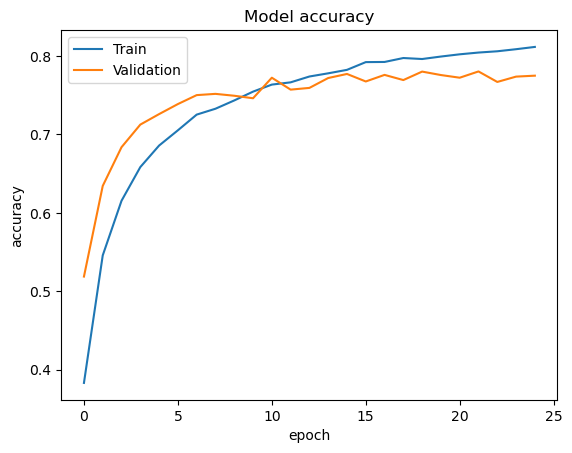

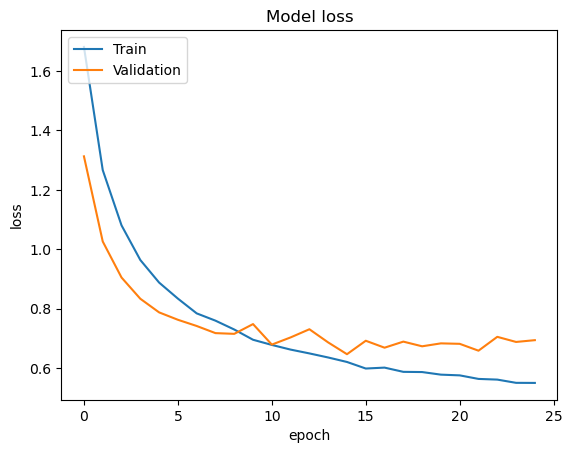

In [16]:
# Подвести итог history для точности (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Подвести итог history для потери (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Задание 3.

1. Изучите и выполните **Пример 4** на **Jupyter Notebook** или **Colab**.
2. Попробуйте изменить нейронную сеть, чтобы улучшить качество решения:
   - Измените количество нейронов в слоях (например, увеличьте `Conv2D(64)` до `128`).
   - Добавьте новые скрытые слои (например, ещё один `Conv2D + MaxPooling2D` каскад).
   - Измените количество эпох обучения (`nb_epoch = 50` или `100`).
   - Измените размер мини-выборки (`batch_size = 64` или `128`).
3. После подбора лучших гиперпараметров, обучите сеть ещё раз на полном объёме данных без разделения на обучающий и проверочный наборы.  
   Во время обучения следите, чтобы не возникло переобучение.
### Решение:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Нормализация
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encoding
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [21]:
model = Sequential()

# Блок 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Блок 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Блок 3 (новый!)
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Полносвязная часть
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

In [22]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

In [23]:
# Callback для остановки при переобучении
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Обучение
history = model.fit(
    X_train, Y_train,
    batch_size=64,          # ↑ с 32 до 64
    epochs=50,              # ↑ с 25 до 50
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
704/704 - 35s - 49ms/step - accuracy: 0.4107 - loss: 1.7207 - val_accuracy: 0.5436 - val_loss: 1.2693
Epoch 2/50
704/704 - 34s - 48ms/step - accuracy: 0.5616 - loss: 1.2479 - val_accuracy: 0.6008 - val_loss: 1.1071
Epoch 3/50
704/704 - 34s - 49ms/step - accuracy: 0.6246 - loss: 1.0644 - val_accuracy: 0.6184 - val_loss: 1.1515
Epoch 4/50
704/704 - 34s - 49ms/step - accuracy: 0.6594 - loss: 0.9695 - val_accuracy: 0.6618 - val_loss: 0.9443
Epoch 5/50
704/704 - 34s - 48ms/step - accuracy: 0.6876 - loss: 0.8886 - val_accuracy: 0.7184 - val_loss: 0.8217
Epoch 6/50
704/704 - 34s - 48ms/step - accuracy: 0.7058 - loss: 0.8342 - val_accuracy: 0.7418 - val_loss: 0.7481
Epoch 7/50
704/704 - 34s - 48ms/step - accuracy: 0.7273 - loss: 0.7839 - val_accuracy: 0.7368 - val_loss: 0.7699
Epoch 8/50
704/704 - 35s - 50ms/step - accuracy: 0.7371 - loss: 0.7469 - val_accuracy: 0.7674 - val_loss: 0.6813
Epoch 9/50
704/704 - 39s - 56ms/step - accuracy: 0.7524 - loss: 0.7130 - val_accuracy: 0.7772 - 

In [24]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Точность на тестовых данных: {scores[1]*100:.2f}%")

Точность на тестовых данных: 82.68%


In [25]:
# Создаём новую модель с той же архитектурой
final_model = Sequential()

# Блок 1
final_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
final_model.add(BatchNormalization())
final_model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Dropout(0.25))

# Блок 2
final_model.add(Conv2D(64, (3, 3), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Dropout(0.25))

# Блок 3
final_model.add(Conv2D(128, (3, 3), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Dropout(0.25))

# Полносвязная часть
final_model.add(Flatten())
final_model.add(Dense(512, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.5))
final_model.add(Dense(nb_classes, activation='softmax'))

# Компиляция
final_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

# Финальное обучение на ВСЕХ обучающих данных
final_history = final_model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=50,
    verbose=2
)

# Финальная оценка
final_scores = final_model.evaluate(X_test, Y_test, verbose=0)
print(f"Финальная точность: {final_scores[1]*100:.2f}%")

Epoch 1/50
782/782 - 45s - 58ms/step - accuracy: 0.4269 - loss: 1.6837
Epoch 2/50
782/782 - 47s - 60ms/step - accuracy: 0.5797 - loss: 1.2044
Epoch 3/50
782/782 - 48s - 62ms/step - accuracy: 0.6400 - loss: 1.0228
Epoch 4/50
782/782 - 46s - 58ms/step - accuracy: 0.6791 - loss: 0.9212
Epoch 5/50
782/782 - 45s - 58ms/step - accuracy: 0.7033 - loss: 0.8505
Epoch 6/50
782/782 - 45s - 57ms/step - accuracy: 0.7235 - loss: 0.7936
Epoch 7/50
782/782 - 44s - 57ms/step - accuracy: 0.7394 - loss: 0.7508
Epoch 8/50
782/782 - 43s - 55ms/step - accuracy: 0.7502 - loss: 0.7148
Epoch 9/50
782/782 - 41s - 53ms/step - accuracy: 0.7610 - loss: 0.6853
Epoch 10/50
782/782 - 39s - 50ms/step - accuracy: 0.7748 - loss: 0.6524
Epoch 11/50
782/782 - 37s - 47ms/step - accuracy: 0.7811 - loss: 0.6289
Epoch 12/50
782/782 - 35s - 45ms/step - accuracy: 0.7862 - loss: 0.6146
Epoch 13/50
782/782 - 33s - 42ms/step - accuracy: 0.7964 - loss: 0.5892
Epoch 14/50
782/782 - 31s - 40ms/step - accuracy: 0.7998 - loss: 0.5739
E